## Problem Statement:
1) Extract reviews of any product from ecommerce website like amazon


## Extracting reviews of Samsung Galaxy Buds 2

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cchar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def get_soup(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
review_list = []
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for i in reviews:
            review  = i.find('span', {'data-hook': 'review-body'}).text.strip()    
            review_list.append(review)
    except:
        pass

In [5]:
for x in range(1,200):
    soup = get_soup(f'https://www.amazon.in/product-reviews/B09DGKPH4R/ref=cm_cr_getr_d_show_all?ie=UTF8&reviewerType=all_reviews={x}')
    get_reviews(soup)
    print(len(review_list))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

0
10
10
10
10
20
30
40
40
40
40
50
50
50
50
60
70
80
90
100
100
110
110
110
110
120
120
120
130
130
140
140
140
140
140
150
150
160
170
170
170
180
190
200
200
210
220
230
230
230
230
230
230
230
240
240
240
240
250
250
250
250
260
260
260
260
260
270
280
280
280
280
280
290
300
300
300
310
320
320
320
320
330
330
330
330
330
330
340
350
350
350
360
360
360
360
370
380
390
390
400
400
410
410
410
420
420
430
430
430
440
440
450
450
460
470
470
470
470
470
470
480
490
490
500
500
510
510
520
530
540
540
550
560
560
570
580
590
600
600
600
600
610
610
620
630
640
640
640
640
650
650
660
670
680
680
680
680
680
690
690
700
700
710
710
720
730
730
730
740
740
740
750
750
750
760
760
770
780
780
780
790
790
790
800
800
810
810
820
830
840
840
850
850
850
850
850
860
860


In [6]:
#Writing reviews in a text file
with open("flex.txt","w",encoding = 'utf-8') as output:
    output.write(str(review_list))

In [7]:
import os
os.getcwd()

'C:\\Users\\cchar\\Assignment\\Text Mining'

In [8]:
# Joining all the reviews into single paragraph
galaxy_buds_string = " ".join(review_list)

In [9]:
#Removing unwanted symbols in case present
galaxy_buds_string = re.sub("[^A-Za-z" "]+"," ",galaxy_buds_string).lower()
galaxy_buds_string =re.sub("[0-9" "]+"," ",galaxy_buds_string)

In [10]:
#Splitting each word with space -- Tokanization
galaxybuds_rev_words = galaxy_buds_string.split(" ")

In [11]:
galaxybuds_rev_words = [w for w in galaxybuds_rev_words if not w in stop_words]

In [12]:
# Joining all the reviews into single paragraph
galaxy_buds_string =" ".join(galaxybuds_rev_words)

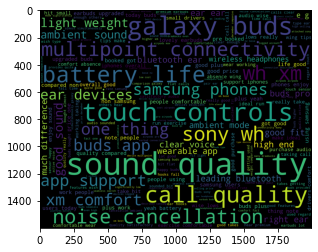

In [13]:
# entire reviews into single paragraph
# Simple word cloud
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=2000,
                      height=1600
                     ).generate(galaxy_buds_string)

plt.imshow(wordcloud_ip)

In [14]:
# positive words
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [15]:
poswords = poswords[38:]

In [16]:
# negative words
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [17]:
negwords =negwords[39:]

In [18]:
#Negative word cloud word cloud
#taking those words from the words which are present in the negative words

galaxybuds_neg= ' '.join([w for w in galaxybuds_rev_words if w in negwords])

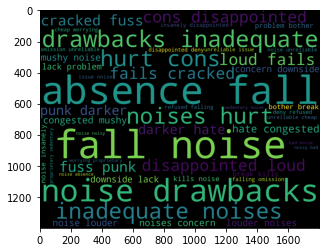

In [19]:
#Negative word cloud
wordcloud_neg= WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(galaxybuds_neg)

plt.imshow(wordcloud_neg)

In [20]:
#Considering only the words which are present in the positive words

buds_pos = " ".join([w for w in galaxybuds_rev_words if w in poswords])

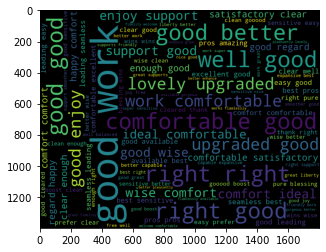

In [21]:
##Building Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(buds_pos)

plt.imshow(wordcloud_pos)

In [22]:
##Unique words
galaxybuds_unique = list(set(" ".join(review_list).split()))

In [23]:
galaxybuds_unique

['ideal',
 'along',
 'over',
 'hooked',
 'issue',
 'FOR',
 'emphasized',
 'touch',
 'Sammy',
 'note',
 'takes',
 'Sometimes,',
 'WH',
 'cheap,',
 'has',
 'hearings.7.',
 'kind',
 '‘emphasis’',
 'noises,',
 'BECOME',
 'just',
 'having',
 'two',
 'that',
 'soundstage',
 'Firstly,',
 'working',
 'lightweight,',
 'you',
 'per',
 'much',
 '11-15khz,',
 'all',
 'sort',
 'matters',
 'continuous',
 'of)',
 'adjust',
 'products',
 'be',
 'thing',
 'simultaneously',
 'too',
 'iPhone.',
 'joy.',
 'though,',
 'noise.After',
 '700,',
 'device,',
 'handle',
 'mandatory',
 'modes',
 'happened',
 'an',
 'bit,',
 'neutral.',
 'e.g.',
 'AMBIENT',
 'percussive',
 'carried',
 'devices.',
 'UPCOMING',
 'compared',
 'IEM',
 'hate.',
 'PROVIDES',
 'support.',
 'phone',
 'well.',
 'buds.',
 'MODE',
 'OFF',
 'charges',
 'take',
 'whenever',
 'treble',
 'had',
 'wise',
 'battery',
 'using',
 'proprietary',
 'noisy',
 'falters',
 'insanely',
 'many',
 'Other',
 'anc',
 'type',
 'ACCOUNT',
 'ANC,',
 'now.',
 'a$$

In [24]:
galaxy_buds_string

'lovely earbuds upgraded buds plus yeah battery life good plus work people comfortable since pre booked got good price one thing note people using samsung phones enjoy sound quality compared non samsung users today buds app support iphones overall good purchase audio wise lows really take hit small drivers comfort absence wing tips make ideal run exercise comfortable wear working taking call call quality satisfactory audio sounded bit flat calls clear enough others hear premium earbuds lot good features wish type ear hooks fall time call quality really good takes getting used regard touch sensor happy buds bought almost simultaneously galaxy buds sony wh xm comfort rate samsung buds higher xm comfort fact one comfortable pair ear devices excellent fit light weight comparison galaxy buds provides quite good sound quality active noise cancelation ambient sound mode significantly low cost airpods airpods pro airpods max sony wh xm bose nc bose qc leading bluetooth ear ear devices however 

In [25]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import sent_tokenize
tknzr = sent_tokenize(galaxy_buds_string)

print(galaxy_buds_string)

lovely earbuds upgraded buds plus yeah battery life good plus work people comfortable since pre booked got good price one thing note people using samsung phones enjoy sound quality compared non samsung users today buds app support iphones overall good purchase audio wise lows really take hit small drivers comfort absence wing tips make ideal run exercise comfortable wear working taking call call quality satisfactory audio sounded bit flat calls clear enough others hear premium earbuds lot good features wish type ear hooks fall time call quality really good takes getting used regard touch sensor happy buds bought almost simultaneously galaxy buds sony wh xm comfort rate samsung buds higher xm comfort fact one comfortable pair ear devices excellent fit light weight comparison galaxy buds provides quite good sound quality active noise cancelation ambient sound mode significantly low cost airpods airpods pro airpods max sony wh xm bose nc bose qc leading bluetooth ear ear devices however b

In [28]:
nlp=spacy.load('en_core_web_sm')

one_block=galaxy_buds_string
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [29]:
for token in doc_block[100:200]:
    print(token,token.pos_)    

galaxy VERB
buds NOUN
sony PROPN
wh PROPN
xm PROPN
comfort PROPN
rate PROPN
samsung PROPN
buds NOUN
higher ADJ
xm NOUN
comfort NOUN
fact PROPN
one NUM
comfortable ADJ
pair NOUN
ear NOUN
devices VERB
excellent ADJ
fit ADJ
light ADJ
weight NOUN
comparison NOUN
galaxy PROPN
buds NOUN
provides VERB
quite ADV
good ADJ
sound ADJ
quality NOUN
active ADJ
noise NOUN
cancelation NOUN
ambient NOUN
sound NOUN
mode NOUN
significantly ADV
low ADJ
cost NOUN
airpods NOUN
airpods NOUN
pro ADJ
airpods NOUN
max PROPN
sony PROPN
wh PROPN
xm PROPN
bose PROPN
nc PROPN
bose PROPN
qc PROPN
leading VERB
bluetooth DET
ear NOUN
ear NOUN
devices NOUN
however ADV
buds VERB
seamless ADJ
earbud PROPN
connection NOUN
described VERB
samsung PROPN
screenshot NOUN
attached VERB
sony PROPN
wh PROPN
xm PROPN
best ADJ
device NOUN
multipoint VERB
connectivity NOUN
many ADJ
drawbacks NOUN
even ADV
high ADJ
selling NOUN
price NOUN
december PROPN
companies NOUN
like ADP
apple NOUN
promote VERB
seamless ADJ
switch NOUN
devices 

In [30]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['device', 'multipoint', 'connectivity', 'drawbacks', 'selling', 'price', 'companies', 'apple', 'promote', 'switch', 'devices', 'logged', 'account', 'platforms', 'battery', 'life', 'buds', 'type', 'devices', 'multipoint', 'connectivity', 'missing', 'leading', 'ear', 'ear', 'headphones', 'present', 'r', 'l', 'earbuds', 'buds', 'connect', 'source', 'device', 'jabras', 'touch', 'controls', 'learning', 'curve', 'acquainted', 'conclusions', 'laptops', 'android', 'phones', 'devices', 'users', 'buds', 'choice', 'galaxy', 'buds', 'app', 'store', 'galaxy', 'store', 'release', 'firmware', 'updates', 'multipoint', 'connectivity', 'buds', 'become', 'choice', 'earbuds', 'cross', 'platform', 'users', 'requires', 'switching', 'windows', 'devices', 'go', 'pros', 'pros', 'quality', 'used', 'hear', 'earphones', 'ambient', 'sound', 'crystal', 'voice', 'irritates', 'provided', 'blocks', 'noises', 'battery', 'backup', 'touch', 'controls', 'handle', 'provides', 'wearables', 'configure', 'hearings', 'light',

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,buds,2236
1,sound,1290
2,quality,1118
3,earbuds,946
4,call,774
5,ear,688
6,using,602
7,devices,602
8,get,517
9,touch,516


In [32]:
wd_df

,word,count
0,buds,2236
1,sound,1290
2,quality,1118
3,earbuds,946
4,call,774
...,...,...
369,environment,86
370,year,86
371,seem,86
372,tell,86


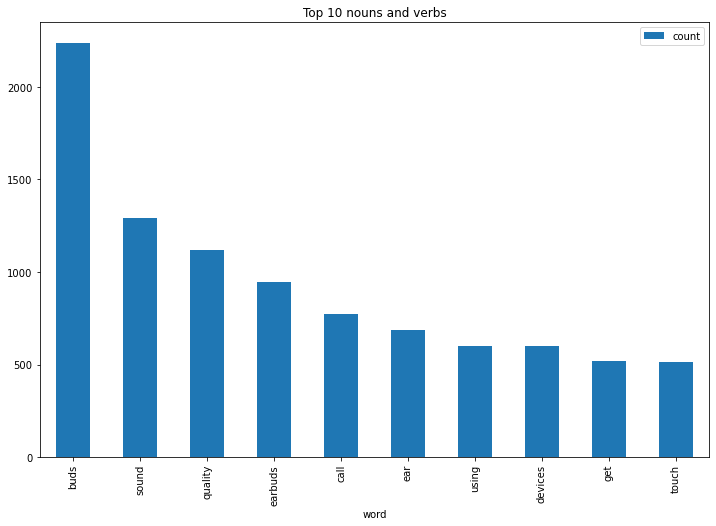

In [33]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [34]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(galaxybuds_unique))
sentences

['ideal along over hooked issue FOR emphasized touch Sammy note takes Sometimes, WH cheap, has hearings.7.',
 'kind ‘emphasis’ noises, BECOME just having two that soundstage Firstly, working lightweight, you per much 11-15khz, all sort matters continuous of) adjust products be thing simultaneously too iPhone.',
 'joy.',
 'though, noise.After 700, device, handle mandatory modes happened an bit, neutral.',
 'e.g.',
 'AMBIENT percussive carried devices.',
 'UPCOMING compared IEM hate.',
 'PROVIDES support.',
 'phone well.',
 'buds.',
 'MODE OFF charges take whenever treble had wise battery using proprietary noisy falters insanely many Other anc type ACCOUNT ANC, now.',
 'a$$.',
 'SWITCH 3-4 install best.5.',
 'Lypertek problem RATE small unlike most 3, missing sometimes lifestyle Hope, bloat res Not He400se wired well have iphones.',
 'me.I Liberty as minutes.',
 'our taking earlier, (once Dusk both refused linear, got did z wing at quality crystal moderate time.',
 'video permissions wir

In [35]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,ideal along over hooked issue FOR emphasized t...
1,"kind ‘emphasis’ noises, BECOME just having two..."
2,joy.
3,"though, noise.After 700, device, handle mandat..."
4,e.g.
...,...
90,"default year, expansive main overestimated sound."
91,portability Tonality: bother reliability.
92,good.
93,heard Easy sony a bassy selling calls WILL bit...


In [36]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [37]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [38]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [39]:
# manual testing
calculate_sentiment(text='great')

3

In [40]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     0
1     3
2     3
3    -1
4     0
     ..
90    0
91   -2
92    3
93    0
94    0
Name: sentiment_value, Length: 95, dtype: int64

In [41]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0     16
1     28
2      1
3     11
4      1
      ..
90     6
91     4
92     1
93    16
94     2
Name: word_count, Length: 95, dtype: int64

In [42]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
13,"Lypertek problem RATE small unlike most 3, mis...",-4,19
48,5khz 8khz After BY pre / drawbacks stuff tws e...,-3,17
74,"similar flawlessly.Touch pro earbuds.Design, E...",-3,23
6,UPCOMING compared IEM hate.,-3,4
47,"smartphone, Battery connected In wears SONY HO...",-2,14
...,...,...,...
68,apps the high PAIR The first great THE APPLE m...,4,20
70,"people wins exercise execution, helmet L dumps...",4,28
79,DESCRIBED easy yet Their spent GOOD tuning.,4,7
58,"overall sibilance contacts, enhance 10k, lovel...",6,24


In [43]:
sent_df['sentiment_value'].describe()

count    95.000000
mean      0.484211
std       1.821054
min      -4.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       7.000000
Name: sentiment_value, dtype: float64

### Negative Reviews

In [44]:
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,ideal along over hooked issue FOR emphasized t...,0,16
3,"though, noise.After 700, device, handle mandat...",-1,11
4,e.g.,0,1
5,AMBIENT percussive carried devices.,0,4
6,UPCOMING compared IEM hate.,-3,4
...,...,...,...
89,now need AND -the said purchases non-fatiguing...,-2,11
90,"default year, expansive main overestimated sound.",0,6
91,portability Tonality: bother reliability.,-2,4
93,heard Easy sony a bassy selling calls WILL bit...,0,16


### Positive Reviews

In [45]:
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
1,"kind ‘emphasis’ noises, BECOME just having two...",3,28
2,joy.,3,1
7,PROVIDES support.,2,2
17,fidelity Priced oneplus learning added yeah mu...,3,26
18,consider eq QUITE wish provided between outsid...,3,22
22,latest like AKG choose I’ll light-weight.COMPA...,3,27
23,ultra use Jabras.- loud idea stick experience ...,2,28
24,midrange.So media emphasis ONLY others seemles...,2,14
27,absence see Amazing bluetooth earbuds.,4,5
29,"audio Soundcore I've kept device try clean, co...",2,36


In [46]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,ideal along over hooked issue FOR emphasized t...,0,16,0
1,"kind ‘emphasis’ noises, BECOME just having two...",3,28,1
2,joy.,3,1,2
3,"though, noise.After 700, device, handle mandat...",-1,11,3
4,e.g.,0,1,4
...,...,...,...,...
90,"default year, expansive main overestimated sound.",0,6,90
91,portability Tonality: bother reliability.,-2,4,91
92,good.,3,1,92
93,heard Easy sony a bassy selling calls WILL bit...,0,16,93


C:\Users\cchar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

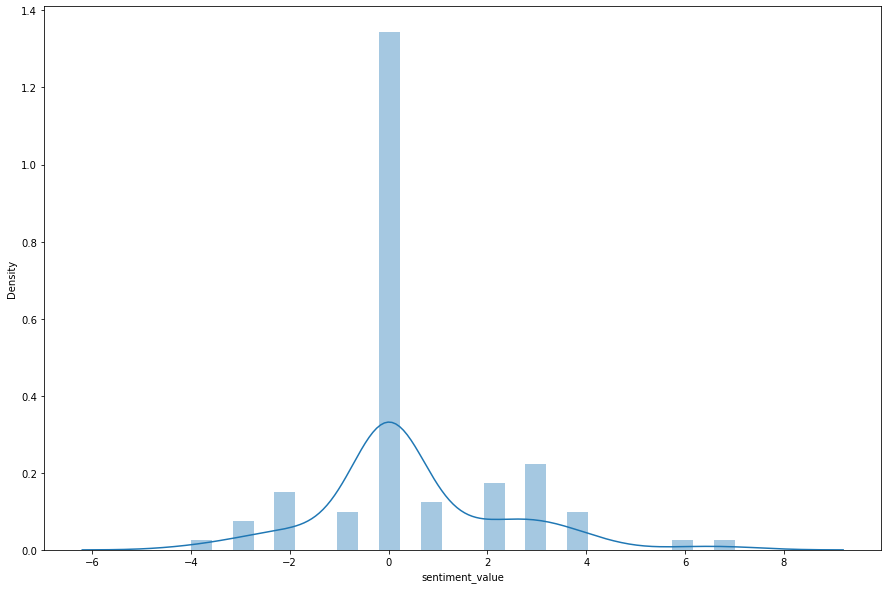

In [47]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

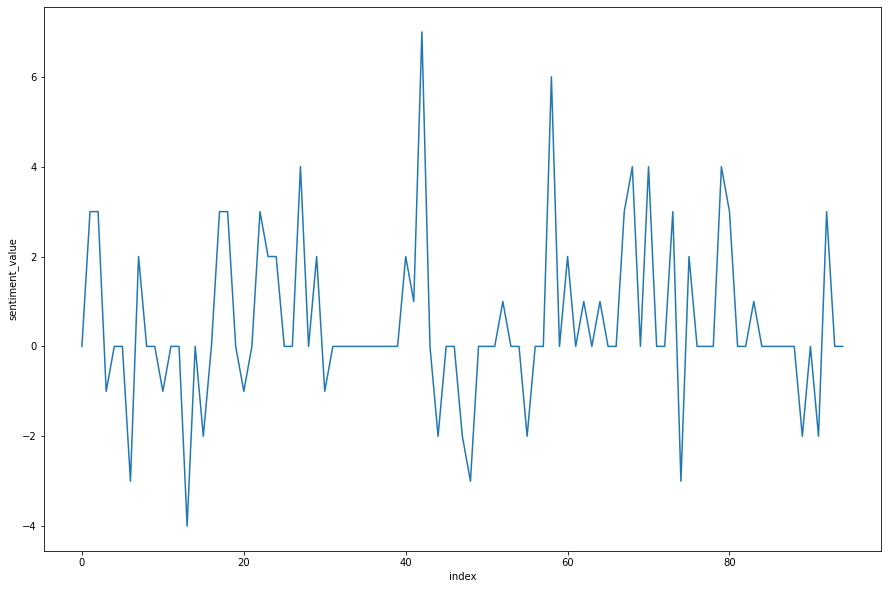

In [48]:
# line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

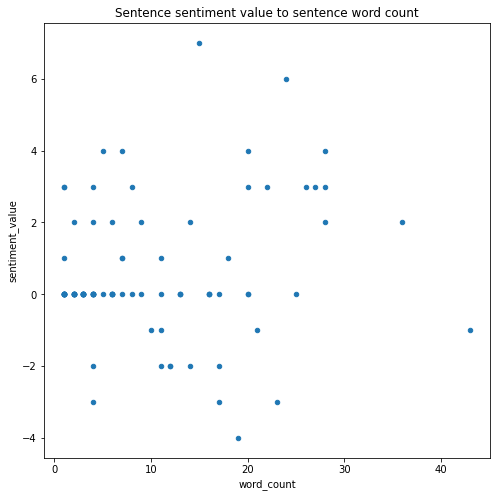

In [49]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')